In [48]:
print("oi")

oi


In [70]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 1.9 MB/s eta 0:00:10
   ---- ----------------------------------- 2.1/19.1 MB 5.9 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/19.1 MB 6.8 MB/s eta 0:00:03
   -------------- ------------------------- 6.8/19.1 MB 8.2 MB/s eta 0:00:02
   ------------------ --------------------- 8.7/19.1 MB 8.3 MB/s eta 0:00:02
   -------------------- ------------------- 10.0/19.1 MB 8.0 MB/s eta 0:00:02
   ------------------------ --------------- 11.8/19.1 MB 7.9 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.1 MB 7.8 MB/s eta 0:00:01
   ------------------------------- -------- 14.9/19.1 MB 7.8 MB/s eta 0:00:01
   ----------------------------------- ---- 16.8/19.1 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 7.9 MB/s eta 0:00:0

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st
import numpy as np

In [50]:
df = pd.read_csv("Base_Melodia.csv")
df = df.sort_values("genre")
df = df.drop("spotify_url",axis=1)
df = df.drop("album_id",axis=1)
df = df.drop("sort_name",axis=1)
df.head(5)

,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between
430,King Sunny Ade,Best of the Classic Years,NaN,NaN,465.0,36,2003,Afrobeat,Compilation,NaN,201,28.0,1.0,Male,1946.0,1982.0,57.0,21.0
386,Fela Kuti,Expensive Shit,NaN,NaN,402.0,99,1975,Afrobeat,Studio,NaN,201,35.0,1.0,Male,1938.0,1970.0,37.0,5.0
0,Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,1.0,Male,1915.0,1946.0,40.0,9.0
452,Willie Nelson,Stardust,257.0,260.0,NaN,-244,1978,Big Band/Jazz,Studio,117.0,30,48.0,1.0,Male,1933.0,1962.0,45.0,16.0
89,John Coltrane,A Love Supreme,47.0,47.0,66.0,-19,1965,Big Band/Jazz,Studio,12.0,64,47.0,1.0,Male,1926.0,1957.0,39.0,8.0


In [51]:
df['genre'] = df['genre'].fillna('Other')
df.head(3)

,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between
430,King Sunny Ade,Best of the Classic Years,NaN,NaN,465.0,36,2003,Afrobeat,Compilation,NaN,201,28.0,1.0,Male,1946.0,1982.0,57.0,21.0
386,Fela Kuti,Expensive Shit,NaN,NaN,402.0,99,1975,Afrobeat,Studio,NaN,201,35.0,1.0,Male,1938.0,1970.0,37.0,5.0
0,Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,1.0,Male,1915.0,1946.0,40.0,9.0


In [52]:
df['genre'] = df['genre'].fillna('Other')
df.head(3)

,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between
430,King Sunny Ade,Best of the Classic Years,NaN,NaN,465.0,36,2003,Afrobeat,Compilation,NaN,201,28.0,1.0,Male,1946.0,1982.0,57.0,21.0
386,Fela Kuti,Expensive Shit,NaN,NaN,402.0,99,1975,Afrobeat,Studio,NaN,201,35.0,1.0,Male,1938.0,1970.0,37.0,5.0
0,Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,1.0,Male,1915.0,1946.0,40.0,9.0


In [53]:
other_genre_albums = df[df['genre'] == 'Other']

# Agrupar por artista e calcular a soma da popularidade no Spotify
grouped_albums = other_genre_albums.groupby('clean_name', as_index=False)['spotify_popularity'].sum()

# Ordenar pelos valores de 'spotify_popularity' em ordem decrescente
sorted_albums = grouped_albums.sort_values(by='spotify_popularity', ascending=False)

# Exibir o resultado
display(sorted_albums)

,clean_name,spotify_popularity
70,The Beatles,664.0
14,David Bowie,403.0
52,Pink Floyd,269.0
69,The Beach Boys,235.0
72,The Byrds,220.0
...,...,...
24,James Brown,0.0
29,Joni Mitchell,0.0
45,Neil Young,0.0
47,Otis Redding,0.0


In [54]:
genre_mapping = {
    'The Beatles': 'Rock n\' Roll/Rhythm & Blues',
    'David Bowie': 'Rock n\' Roll/Rhythm & Blues',
    'Pink Floyd': 'Rock n\' Roll/Rhythm & Blues',
    'The Beach Boys': 'Rock n\' Roll/Rhythm & Blues',
    'The Byrds': 'Indie/Alternative Rock',
    'Prince': 'Rock n\' Roll/Rhythm & Blues',
    'Steely Dan': 'Rock n\' Roll/Rhythm & Blues',
    'Nick Drake': 'Indie/Alternative Rock',
    'Tom Petty': 'Rock n\' Roll/Rhythm & Blues',
    'Beyonce': 'Soul/Gospel/R&B',
    'Tom Waits': 'Singer-Songwriter/Heartland Rock',
    'The Who': 'Rock n\' Roll/Rhythm & Blues',
    'Jackson Browne': 'Rock n\' Roll/Rhythm & Blues',
    'John Lennon': 'Rock n\' Roll/Rhythm & Blues',
    'Madonna': 'Pop',
    'Van Morrison': 'Singer-Songwriter/Heartland Rock',
    'Paul Simon': 'Singer-Songwriter/Heartland Rock',
    'The Mamas and the Papas': 'Folk Rock',
    'Lou Reed': 'Indie/Alternative Rock',
    'Jefferson Airplane': 'Folk Rock',
    'The Kinks': 'Punk/Post-Punk/New Wave/Power Pop',
    'Bjork': 'Electronic',
    'Randy Newman': 'Singer-Songwriter/Heartland Rock',
    'Brian Eno': 'Electronic',
    'Mott the Hoople': 'Rock n\' Roll/Rhythm & Blues',
    'The Weeknd': 'Hip-Hop/Rap',
    'Lana Del Ray': 'Indie/Alternative Rock',
    'The Mothers of Invention': 'Rock n\' Roll/Rhythm & Blues',
    'Taylor Swift': 'Country/Folk/Country Rock/Folk Rock',
    'Lorde': 'Indie/Alternative Rock',
    'Tracey Chapman': 'Singer-Songwriter/Heartland Rock',
    'Weezer': 'Indie/Alternative Rock',
    'Kate Bush': 'Indie/Alternative Rock',
    'Britney Spears': 'Pop',
    'Destiny\'s Child': 'Soul/Gospel/R&B',
    'Jeff Buckley': 'Singer-Songwriter/Heartland Rock',
    'George Michael': 'Soul/Gospel/R&B',
    'Cocteau Twins': 'Indie/Alternative Rock',
    'Sinead O\'Connor': 'Soul/Gospel/R&B',
    'The Zombies': 'Rock n\' Roll/Rhythm & Blues',
    'James Taylor': 'Singer-Songwriter/Heartland Rock',
    'Paul McCartney': 'Rock n\' Roll/Rhythm & Blues',
    'Little Richard': 'Rock n\' Roll/Rhythm & Blues',
    'Richard & Linda Thompson': 'Folk Rock',
    'The Breeders': 'Indie/Alternative Rock',
    'Meat Loaf': 'Rock n\' Roll/Rhythm & Blues',
    'Rod Stewart': 'Rock n\' Roll/Rhythm & Blues',
    'Elliott Smith': 'Indie/Alternative Rock',
    'Depeche Mode': 'Electronic',
    'Harry Nilsson': 'Singer-Songwriter/Heartland Rock',
    'Yo La Tengo': 'Indie/Alternative Rock',
    'Linda Ronstadt': 'Folk Rock',
    'The Magnetic Fields': 'Indie/Alternative Rock',
    'Sheryl Crow': 'Singer-Songwriter/Heartland Rock',
    'DJ Shadow': 'Hip-Hop/Rap',
    'Simon & Garfunkel': 'Folk Rock',
    'The Carpenters': 'Pop',
    'Buffalo Springfield': 'Rock n\' Roll/Rhythm & Blues',
    'Todd Rundgren': 'Rock n\' Roll/Rhythm & Blues',
    'Minutemen': 'Punk/Post-Punk/New Wave/Power Pop',
    'Hank Williams': 'Country/Folk/Country Rock/Folk Rock',
    'Steve Earle': 'Country/Folk/Country Rock/Folk Rock',
    'Rihanna': 'Soul/Gospel/R&B',
    'ABBA': 'Pop',
    'Wilco': 'Indie/Alternative Rock',
    'Peter Gabriel': 'Rock n\' Roll/Rhythm & Blues',
    'Robert Johnson': 'Blues/Blues Rock',
    'Love': 'Rock n\' Roll/Rhythm & Blues',
    'Belle & Sebastian': 'Indie/Alternative Rock',
    'The Modern Lovers': 'Indie/Alternative Rock',
    'Sparks': 'Indie/Alternative Rock',
    'Wu-Tang Clan': 'Hip-Hop/Rap',
    'The Flying Burrito Brothers': 'Country/Folk/Country Rock/Folk Rock',
    'Can': 'Rock n\' Roll/Rhythm & Blues',
    'Queen': 'Rock n\' Roll/Rhythm & Blues',
    'Tori Amos': 'Singer-Songwriter/Heartland Rock',
    'Blood, Sweat & Tears': 'Rock n\' Roll/Rhythm & Blues',
    'Ian Dury and the Blockheads': 'Rock n\' Roll/Rhythm & Blues',
    'Boz Scaggs': 'Rock n\' Roll/Rhythm & Blues',
    'Brian Wilson': 'Rock n\' Roll/Rhythm & Blues',
    'War': 'Rock n\' Roll/Rhythm & Blues',
    'Moby Grape': 'Rock n\' Roll/Rhythm & Blues',
    'Yes': 'Rock n\' Roll/Rhythm & Blues',
    'Peter Wolf': 'Rock n\' Roll/Rhythm & Blues',
    'Laura Nyro': 'Singer-Songwriter/Heartland Rock',
    'Professor Longhair': 'Blues/Blues Rock',
    'Graham Parker': 'Rock n\' Roll/Rhythm & Blues',
    'Kelis': 'Hip-Hop/Rap',
    'The Pogues': 'Rock n\' Roll/Rhythm & Blues',
    'Captain Beefheart & His Magic Band': 'Rock n\' Roll/Rhythm & Blues',
    'James Brown': 'Soul/Gospel/R&B',
    'Joni Mitchell': 'Singer-Songwriter/Heartland Rock',
    'Otis Redding': 'Soul/Gospel/R&B',
    'Neil Diamond': 'Singer-Songwriter/Heartland Rock',
    'Neil Young': 'Singer-Songwriter/Heartland Rock'
}

df['genre'] = df['clean_name'].map(genre_mapping).fillna(df['genre'])

display(df[['clean_name', 'genre']])

,clean_name,genre
430,King Sunny Ade,Afrobeat
386,Fela Kuti,Afrobeat
0,Frank Sinatra,Big Band/Jazz
452,Willie Nelson,Big Band/Jazz
89,John Coltrane,Big Band/Jazz
...,...,...
667,Boz Scaggs,Rock n' Roll/Rhythm & Blues
668,Ian Dury and the Blockheads,Rock n' Roll/Rhythm & Blues
671,Linda Ronstadt,Folk Rock
685,Peter Wolf,Rock n' Roll/Rhythm & Blues


In [55]:
df['genre'] = df['genre'].replace({"Blues/Blues ROck": "Blues/Blues Rock"})

In [56]:
print(df["genre"].unique())

['Afrobeat' 'Big Band/Jazz' 'Blues/Blues Rock'
 "Rock n' Roll/Rhythm & Blues" 'Folk Rock'
 'Country/Folk/Country Rock/Folk Rock' 'Singer-Songwriter/Heartland Rock'
 'Electronic' 'Pop' 'Funk/Disco' 'Soul/Gospel/R&B' 'Hard Rock/Metal'
 'Hip-Hop/Rap' 'Indie/Alternative Rock' 'Latin'
 'Punk/Post-Punk/New Wave/Power Pop' 'Reggae' 'Other']


In [57]:
pd.set_option('display.max_columns', None)

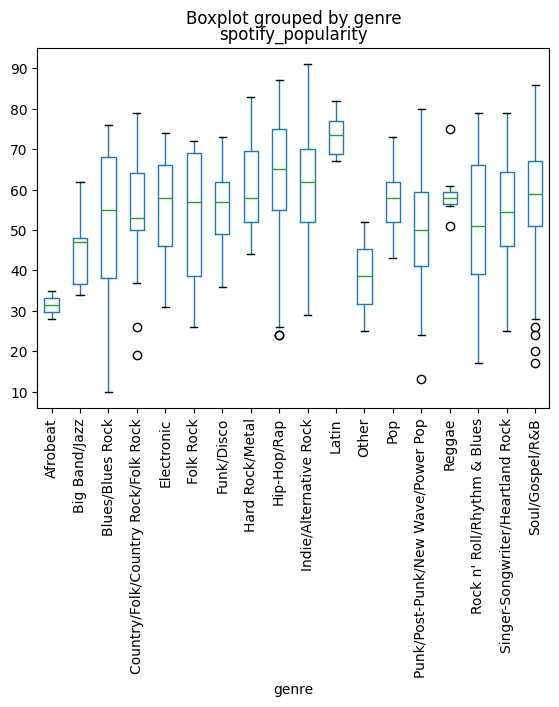

In [73]:

box = df.boxplot(column='spotify_popularity', by='genre', grid=False, rot=90,)

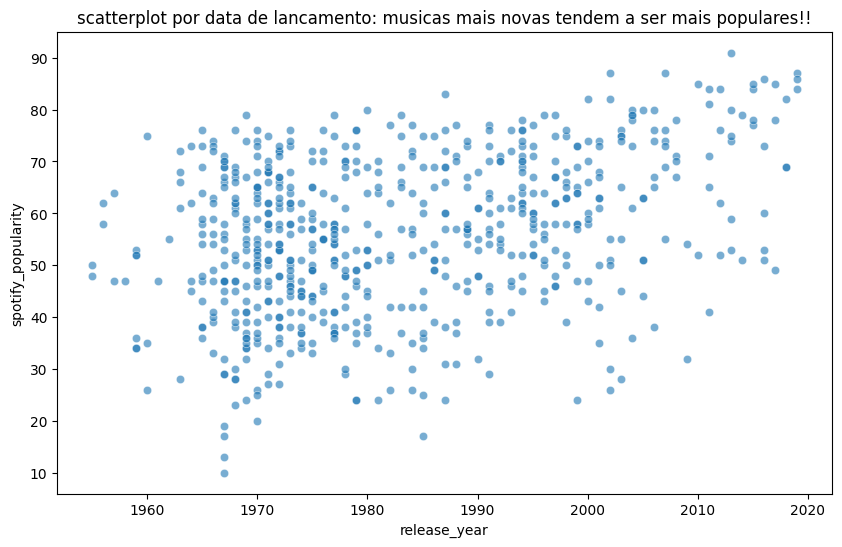

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='spotify_popularity', alpha= 0.6)
plt.title('scatterplot por data de lancamento: musicas mais novas tendem a ser mais populares!!')
plt.show()

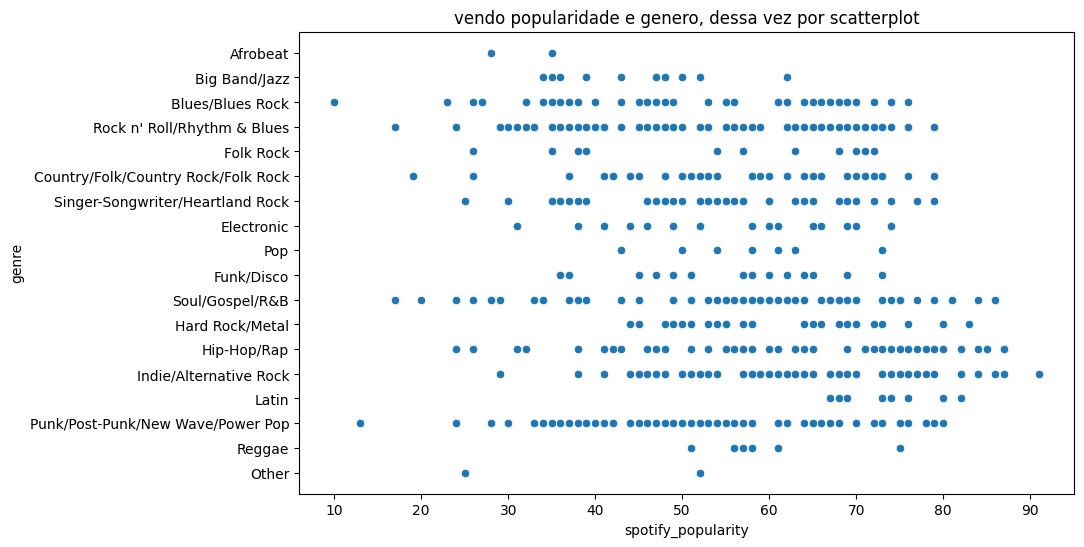

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='spotify_popularity', y='genre')
plt.title('vendo popularidade e genero, dessa vez por scatterplot')
plt.show()

In [61]:
df['average_age'] = 2024-(df["artist_birth_year_sum"]/df["artist_member_count"])
df.head(5)

,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,weeks_on_billboard,peak_billboard_position,spotify_popularity,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,average_age
430,King Sunny Ade,Best of the Classic Years,NaN,NaN,465.0,36,2003,Afrobeat,Compilation,NaN,201,28.0,1.0,Male,1946.0,1982.0,57.0,21.0,78.0
386,Fela Kuti,Expensive Shit,NaN,NaN,402.0,99,1975,Afrobeat,Studio,NaN,201,35.0,1.0,Male,1938.0,1970.0,37.0,5.0,86.0
0,Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,14.0,2,48.0,1.0,Male,1915.0,1946.0,40.0,9.0,109.0
452,Willie Nelson,Stardust,257.0,260.0,NaN,-244,1978,Big Band/Jazz,Studio,117.0,30,48.0,1.0,Male,1933.0,1962.0,45.0,16.0,91.0
89,John Coltrane,A Love Supreme,47.0,47.0,66.0,-19,1965,Big Band/Jazz,Studio,12.0,64,47.0,1.0,Male,1926.0,1957.0,39.0,8.0,98.0


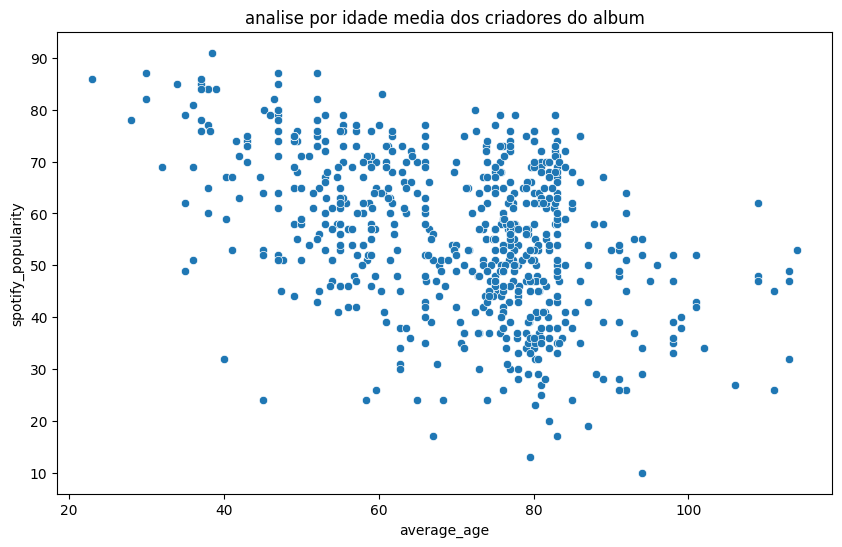

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='average_age', y='spotify_popularity')
plt.title('analise por idade media dos criadores do album')
plt.show()

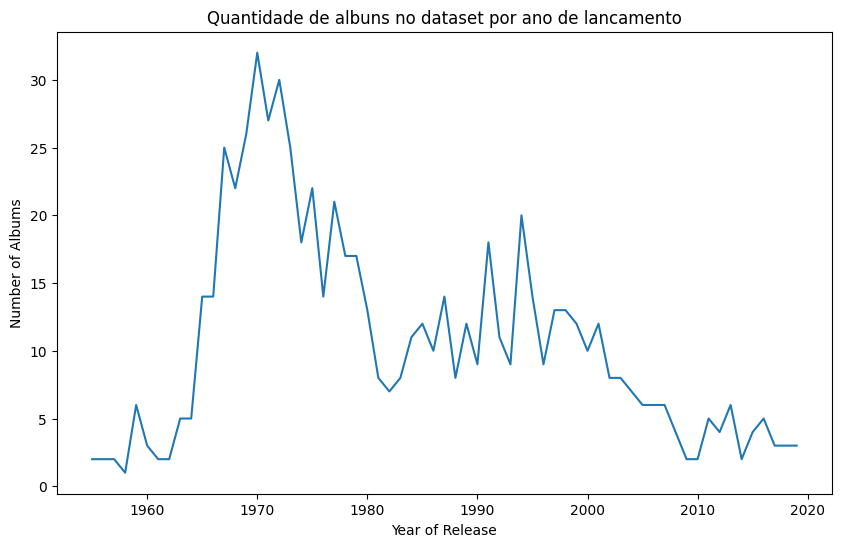

In [63]:
albums_per_year = df.groupby('release_year').size().reset_index(name='album_count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=albums_per_year, x='release_year', y='album_count')
plt.title('Quantidade de albuns no dataset por ano de lancamento')
plt.xlabel('Year of Release')
plt.ylabel('Number of Albums')
plt.show()

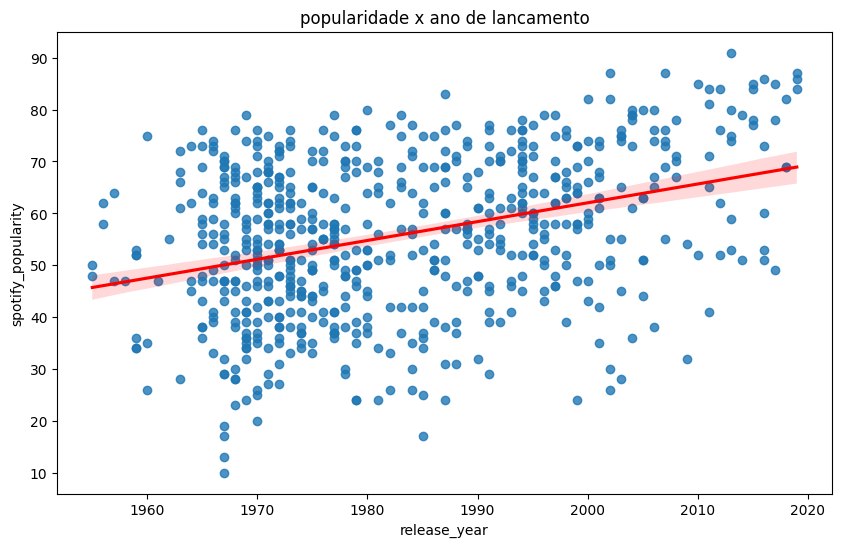

In [64]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='release_year', y='spotify_popularity', scatter=True, line_kws={"color": "red"})
plt.title('popularidade x ano de lancamento')
plt.xlabel('release_year')
plt.ylabel('spotify_popularity')
plt.show()
#o coeficiente linear da reta e aproximadamente 0.4

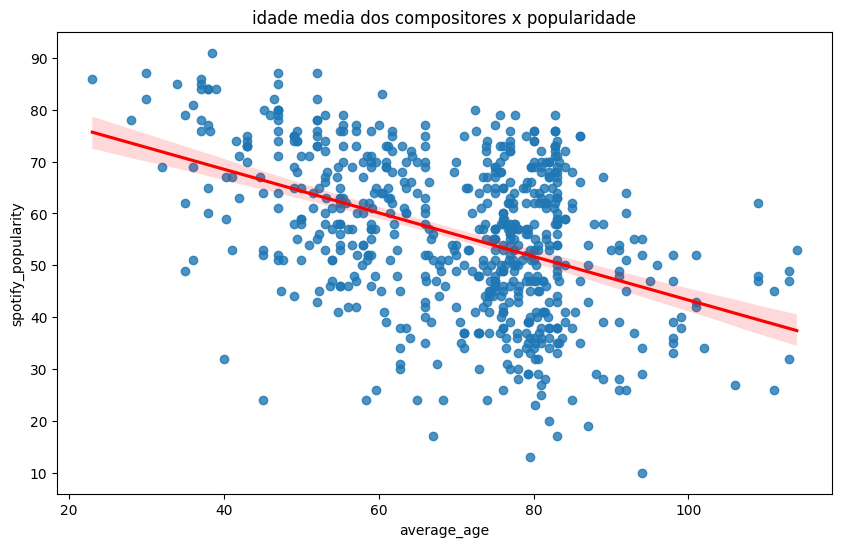

In [65]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='average_age', y='spotify_popularity', scatter=True, line_kws={"color": "red"})
plt.title("idade media dos compositores x popularidade")
plt.show()
#o coeficiente linear dessa regressao eh aproximadamente -0.5